# Flight Price Prediction Project
Developed a predictive model to estimate flight prices using a dataset of flight information. 
The project involved extensive Exploratory Data Analysis (EDA) to understand the factors influencing flight prices, 
followed by feature engineering to create new variables for improving model accuracy. Utilized Python libraries 
like Pandas, NumPy, Matplotlib, and Seaborn for data processing and visualization, and 
built predictive models to forecast flight prices effectively.

In [1]:
#Import all the libraries whch we use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Flight Price Predictions (EDA (Exploratory Data Analysis) + Features Engineering)


#Importing the important libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
train_data=pd.read_excel('data_train.xlsx')

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Processing The data

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Dropping the null values

In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
def change_type(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [17]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_type(i)

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3385495439.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3385495439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3385495439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])


# Start dealing with Datatime data type columns 

In [19]:
train_data['Journey_Day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_Month']=train_data['Date_of_Journey'].dt.month

In [20]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-09-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 05:50:00,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-09-01 18:05:00,2024-09-01 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-09-01 16:50:00,2024-09-01 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [22]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

def extract_min(df,col):
    df[col+'_minutes']=df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [23]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [24]:
train_data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50


In [25]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [26]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [27]:
# Now We are Going to Chnage the Duration Columns which have value in Hours & minutes 

In [28]:
kk=list(train_data['Duration'])

In [29]:
len(kk)

10682

In [30]:
range(len(kk))

range(0, 10682)

In [31]:
kk[0]

'2h 50m'

In [32]:
kk[0].split(' ')


['2h', '50m']

In [33]:
len(kk[0].split(' '))

2

In [34]:
for i in range(len(kk)):
    if len(kk[i].split(' '))==2:
        pass
    else:
        if 'h' in kk[i]:
            kk[i]=kk[i] +' '+ '0m'
        else:
            kk[i]='0h'+' ' + kk[i]


In [35]:
train_data['Duration']=kk

In [36]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [37]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [38]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [39]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[0][0:-1]

In [40]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_min']=train_data['Duration'].apply(min)


In [41]:
train_data.drop('Duration',axis=1,inplace=True)

In [42]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,7


In [43]:
train_data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
Journey_Day              int32
Journey_Month            int32
Dep_Time_hour            int32
Dep_Time_minutes         int32
Arrival_Time_hour        int32
Arrival_Time_minutes     int32
Duration_hour           object
Duration_min            object
dtype: object

In [44]:
train_data['Duration_hour']=train_data['Duration_hour'].astype(int)
train_data['Duration_min']=train_data['Duration_min'].astype(int)

In [45]:
train_data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
Journey_Day              int32
Journey_Month            int32
Dep_Time_hour            int32
Dep_Time_minutes         int32
Arrival_Time_hour        int32
Arrival_Time_minutes     int32
Duration_hour            int32
Duration_min             int32
dtype: object

In [46]:
#Creating a new df which contains only columns which datatype is object
Cat_Object=[i for i in train_data.columns if train_data[i].dtype=='object']
Cat_Object

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [47]:
#Creating a new df which contains only columns which datatype is int
Num=[i for i in train_data.columns if train_data[i].dtype!='object']
Num

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hour',
 'Duration_min']

In [48]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [49]:
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [51]:
train_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [52]:
Categorical=train_data[Cat_Object]

In [53]:
type(Categorical)

pandas.core.frame.DataFrame

In [54]:
Categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


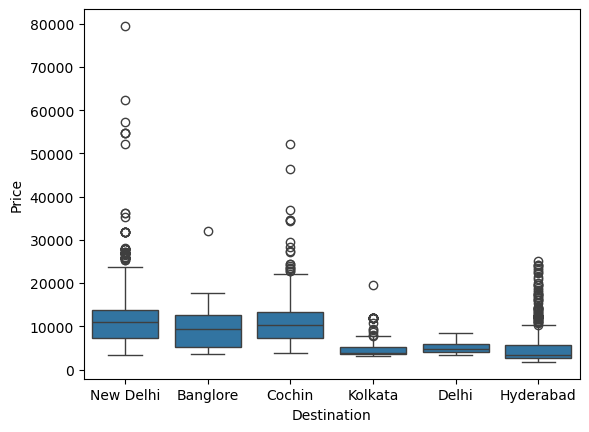

In [55]:
#Visualization of Data
sns.boxplot(x='Destination',y='Price',data=train_data)
plt.show()

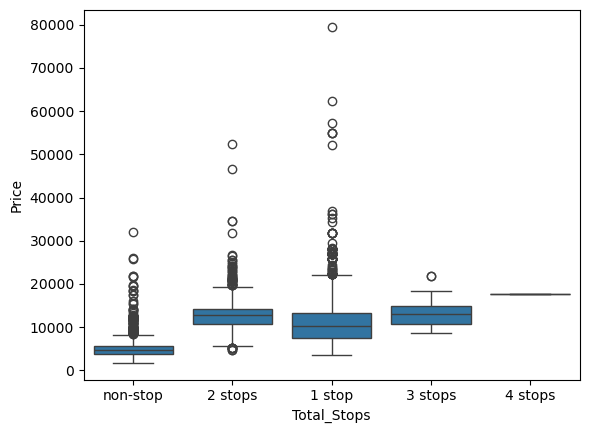

In [56]:
#Visualization of Data
sns.boxplot(x='Total_Stops',y='Price',data=train_data)
plt.show()

In [57]:
Categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [58]:
#Checking and converting the categorical data to number
Airline = pd.get_dummies(Categorical['Airline'], drop_first=True).astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [59]:
#Checking and converting the categorical data to number
Source = pd.get_dummies(Categorical['Source'], drop_first=True).astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [60]:
#Checking and converting the categorical data to number
Destination = pd.get_dummies(Categorical['Destination'], drop_first=True).astype(int)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [61]:
Categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [65]:
Categorical['Route_1']=Categorical['Route'].str.split('→').str[0]
Categorical['Route_2']=Categorical['Route'].str.split('→').str[1]
Categorical['Route_3']=Categorical['Route'].str.split('→').str[2]
Categorical['Route_4']=Categorical['Route'].str.split('→').str[3]
Categorical['Route_5']=Categorical['Route'].str.split('→').str[4]

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\2105347634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Route_1']=Categorical['Route'].str.split('→').str[0]
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\2105347634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Route_2']=Categorical['Route'].str.split('→').str[1]
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\2105347634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [75]:
Categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [85]:
drop_column(Categorical,'Route')

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\4165711627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [106]:
Categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [113]:
Categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [115]:
Categorical.shape

(10682, 10)

In [116]:
Categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [123]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    Categorical[i].fillna('None',inplace=True)

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\772287863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Categorical[i].fillna('None',inplace=True)
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\772287863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical[i].fillna('None',inplace=True)


In [126]:
Categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [128]:
Categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [129]:
len(Categorical['Destination'].value_counts())

6

In [134]:
for i in Categorical.columns:
    print('{} has total {} categories'.format(i,len(Categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [136]:
from sklearn.preprocessing import LabelEncoder


In [141]:
enc=LabelEncoder()

In [143]:
Categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [146]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    Categorical[i]=enc.fit_transform(Categorical[i])

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3296887793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical[i]=enc.fit_transform(Categorical[i])
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3296887793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical[i]=enc.fit_transform(Categorical[i])
C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\3296887793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [148]:
Categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [150]:
Categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [152]:
dic={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [154]:
Categorical['Total_Stops']=Categorical['Total_Stops'].map(dic)

C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\1372313320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Total_Stops']=Categorical['Total_Stops'].map(dic)


In [156]:
Categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


In [158]:
data=pd.concat([Categorical,Airline,Source,Destination,train_data[Num]],axis=1)

In [160]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,...,1,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,...,0,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,...,0,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,...,0,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,...,1,13302,1,3,16,50,21,35,4,4


In [161]:
pd.set_option('display.max_columns',50)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,4


In [164]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')
drop_column(data,'Additional_Info')


In [166]:
data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Time_hour',
       'Dep_Time_minutes', 'Arrival_Time_hour', 'Arrival_Time_minutes',
       'Duration_hour', 'Duration_min'],
      dtype='object')

In [168]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,2
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,7
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,19
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,5
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,4


In [170]:
data.shape

(10682, 35)

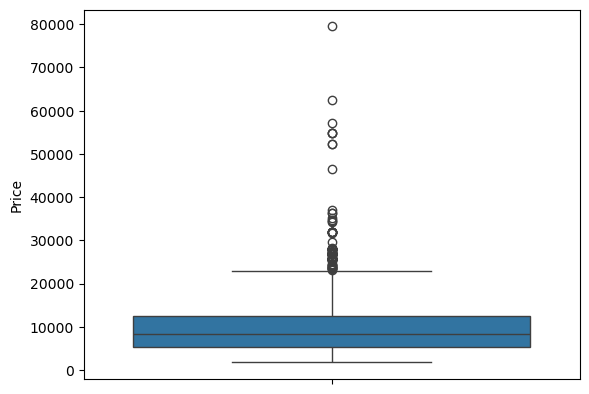

In [172]:
sns.boxplot(y='Price',data=data)
plt.show()

In [174]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

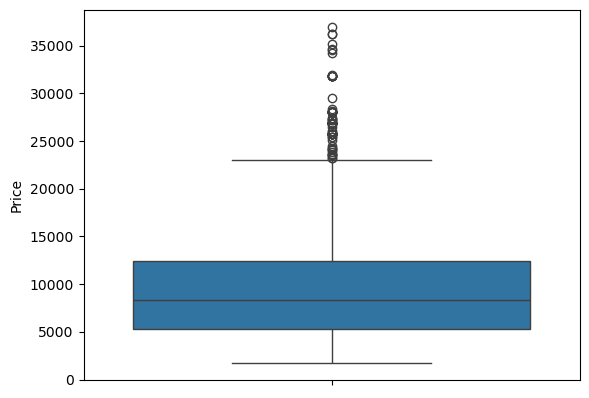

In [176]:
#Price less than 40000
sns.boxplot(y='Price',data=data)
plt.show()

In [178]:
X=data

In [180]:
X.shape

(10682, 35)

In [182]:
y=data['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [184]:
y.shape

(10682,)

# Feature selection 


In [187]:
from sklearn.feature_selection import mutual_info_classif

In [189]:
mutual_info_classif(X,y)

array([1.90720838, 2.32070807, 3.02629431, 2.5352653 , 1.71500936,
       1.43148001, 0.66724253, 0.09558292, 0.62616885, 0.87880767,
       0.        , 0.54383867, 0.02512395, 0.3122366 , 0.        ,
       0.21512313, 0.        , 0.17481962, 1.37318381, 0.8565578 ,
       0.28270908, 1.40877372, 0.40798321, 0.27961807, 0.15012409,
       0.32974868, 6.33302814, 0.89636209, 1.64420977, 1.54122254,
       1.28575714, 1.89384695, 1.62165829, 1.77271894, 1.77327723])

In [190]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.876669
Route_1,2.336915
Route_2,3.018428
Route_3,2.527567
Route_4,1.708230
Route_5,1.432819
Air India,0.683525
GoAir,0.089140
IndiGo,0.608641
Jet Airways,0.846185


In [191]:
imp.columns=['Imp']
imp

,Imp
Total_Stops,1.876669
Route_1,2.336915
Route_2,3.018428
Route_3,2.527567
Route_4,1.708230
Route_5,1.432819
Air India,0.683525
GoAir,0.089140
IndiGo,0.608641
Jet Airways,0.846185


In [192]:
imp.sort_values(by='Imp',ascending=False)

,Imp
Price,6.329122
Route_2,3.018428
Route_3,2.527567
Route_1,2.336915
Arrival_Time_hour,1.923258
Total_Stops,1.876669
Duration_min,1.785449
Duration_hour,1.769611
Route_4,1.708230
Journey_Month,1.656925


In [194]:
from sklearn.model_selection import train_test_split


In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [196]:
from sklearn import metrics


In [197]:
def predict(ml_model):
    
    model= ml_model.fit(X_train,y_train)
    print('Training_Score: {}'.format(model.score(X_train,y_train)))

    
    y_pred=model.predict(X_test)
    print('Predictions are{}'.format(y_pred))
    
    r2=metrics.r2_score(y_test,y_pred)
    print('R2 Score :{}'.format(r2))
    
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))
    
    
    sns.distplot(y_test - y_pred)
    

In [198]:
from sklearn.ensemble import RandomForestRegressor

Training_Score: 0.9999895929197116
Predictions are[14781.    5636.22  3597.   ...  8307.96  5198.    6361.82]
R2 Score :0.9999397393392283
Mean Absolute Error : 2.9304717334331847
Mean Squared Error : 1191.673578547363


C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\615224778.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


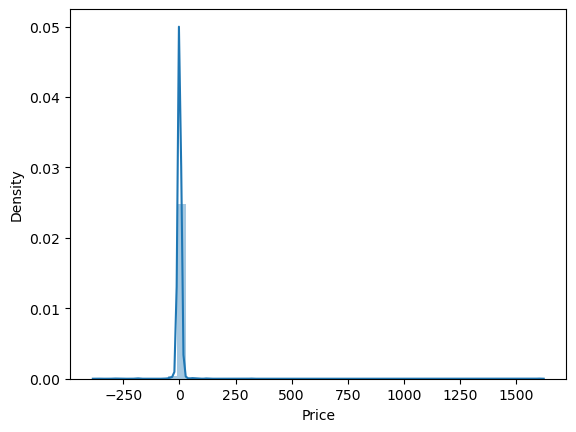

In [199]:
predict(RandomForestRegressor())


In [200]:
from sklearn.linear_model import LinearRegression


Training_Score: 1.0
Predictions are[14781.  5636.  3597. ...  8309.  5198.  6354.]
R2 Score :1.0
Mean Absolute Error : 2.579256829747094e-12
Mean Squared Error : 1.1853423078184946e-23


C:\Users\Krishna K Yadav\AppData\Local\Temp\ipykernel_8704\615224778.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


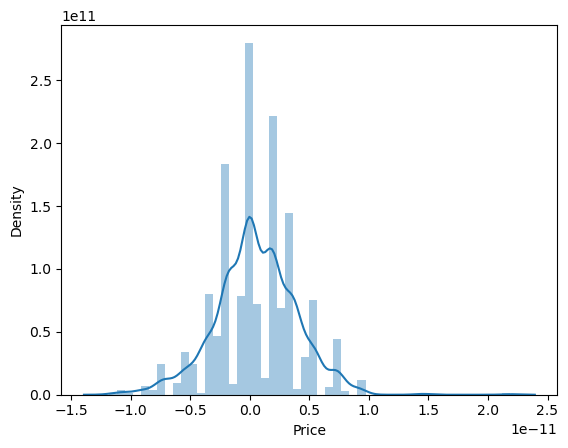

In [201]:
predict(LinearRegression())


In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=4)]
min_samples_split=[5,10,15,100]

In [204]:
dic={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [205]:
reg=RandomForestRegressor()

In [206]:
rf_rand=RandomizedSearchCV(estimator=reg,param_distributions=dic,cv=3,verbose=2,n_jobs=-1)

In [207]:
rf_rand.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Krishna K Yadav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krishna K Yadav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krishna K Yadav\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Krishna K Yadav\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\U

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [208]:
y_pred=rf_rand.predict(X_test)


In [209]:
metrics.r2_score(y_test,y_pred)


0.9641878663346034